## Importing Libraries

In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits.mplot3d

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

## Data Preprocessing

Here's a brief explanation of each column in the dataset:

1. Country name: Name of the country  

2. Regional indicator: Region to which the country belongs.

3. Ladder score: The happiness score for each country, based on responses to the Cantril Ladder question that asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0.

4. Upper whisker: Upper bound of the happiness score.

5. Lower whisker: Lower bound of the happiness score.

6. Log GDP per capita: The natural logarithm of the country's GDP per capita, adjusted for purchasing power parity (PPP) to account for differences in the cost of living between countries.

7. Social support: The national average of binary responses(either 0 or 1 representing No/Yes) to the question about having relatives or friends to count on in times of trouble.

8. Healthy life expectancy: The average number of years a newborn infant would live in good health, based on mortality rates and life expectancy at different ages.

9. Freedom to make life choices: The national average of responses to the question about satisfaction with freedom to choose what to do with one's life.

10. Generosity: The residual of regressing the national average of responses to the question about donating money to charity on GDP per capita.

11. Perceptions of corruption: The national average of survey responses to questions about the perceived extent of corruption in the government and businesses.

12. Dystopia + residual: Dystopia is an imaginary country with the world’s least-happy people, used as a benchmark for comparison. The dystopia + residual score is a combination of the Dystopia score and the unexplained residual for each country, ensuring that the combined score is always positive. Each of these factors contributes to the overall happiness score, but the Dystopia + residual value is a benchmark that ensures no country has a lower score than the hypothetical Dystopia.

In [35]:
dataset_path = "World-happiness-report-2024.csv"

df = pd.read_csv(dataset_path, encoding='unicode_escape')
df.head(10)

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,Western Europe,7.319,7.383,7.256,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,Western Europe,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,Western Europe,7.122,7.213,7.031,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,Western Europe,7.060,7.147,6.973,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,North America and ANZ,7.057,7.141,6.973,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [37]:
df.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

In [ ]:
# drop rows with atleast 1 missing value
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  140 non-null    object 
 1   Regional indicator            140 non-null    object 
 2   Ladder score                  140 non-null    float64
 3   upperwhisker                  140 non-null    float64
 4   lowerwhisker                  140 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 14.2+ KB


## Feature Importance - Decision Tree

In [41]:
df_copy = df.copy()

X = df_copy[['Log GDP per capita', 'Social support', 'Healthy life expectancy', 
             'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

# target feature
y = df['Ladder score']

In [42]:
# X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42)

Feature: Log GDP per capita, Score: 0.15649007621968872
Feature: Social support, Score: 0.5979459012296319
Feature: Healthy life expectancy, Score: 0.05588434549917795
Feature: Freedom to make life choices, Score: 0.12224883177621872
Feature: Generosity, Score: 0.046960501221574906
Feature: Perceptions of corruption, Score: 0.02047034405370779


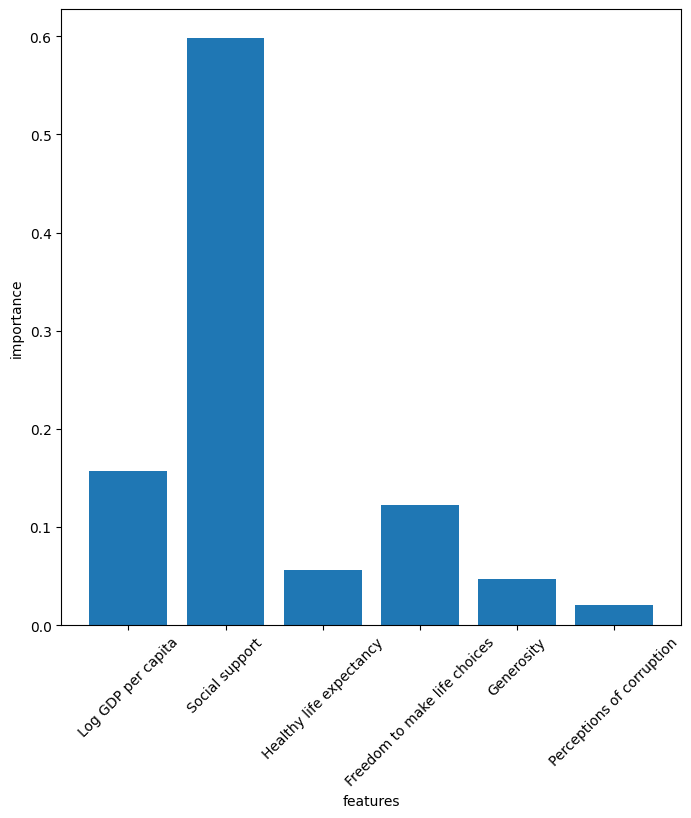

In [43]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X, y)

importance = tree.feature_importances_

for a, b in zip(X.columns, importance):
    print(f'Feature: {a}, Score: {b}')


plt.figure(figsize=(8, 8))
plt.bar(X.columns, importance)
plt.xlabel("features")
plt.ylabel("importance")
plt.xticks(rotation=45)
plt.show()

## WCSS

In [44]:
X = X[['Social support', 'Freedom to make life choices', 'Log GDP per capita']]

In [45]:
# scaling
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

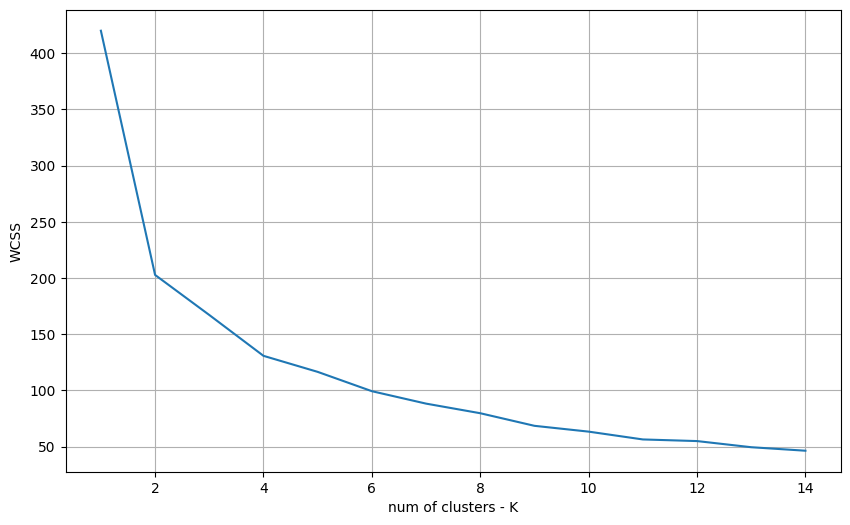

In [ ]:
# elbow method
wcss = []
K = range(1, 15)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(X_scale)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, wcss)
plt.xlabel('num of clusters - K')
plt.ylabel('WCSS')
plt.grid()
plt.show()

## K-Means Clustering

In [53]:
# clustering 
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scale)

In [54]:
centroids = kmeans.cluster_centers_
print(f"centroids are: \n{centroids}")

centroids are: 
[[ 0.06181986  0.4486084  -0.1377364 ]
 [-1.14205569 -0.97248057 -1.11487467]
 [ 0.82378336  0.39189132  0.95904366]]


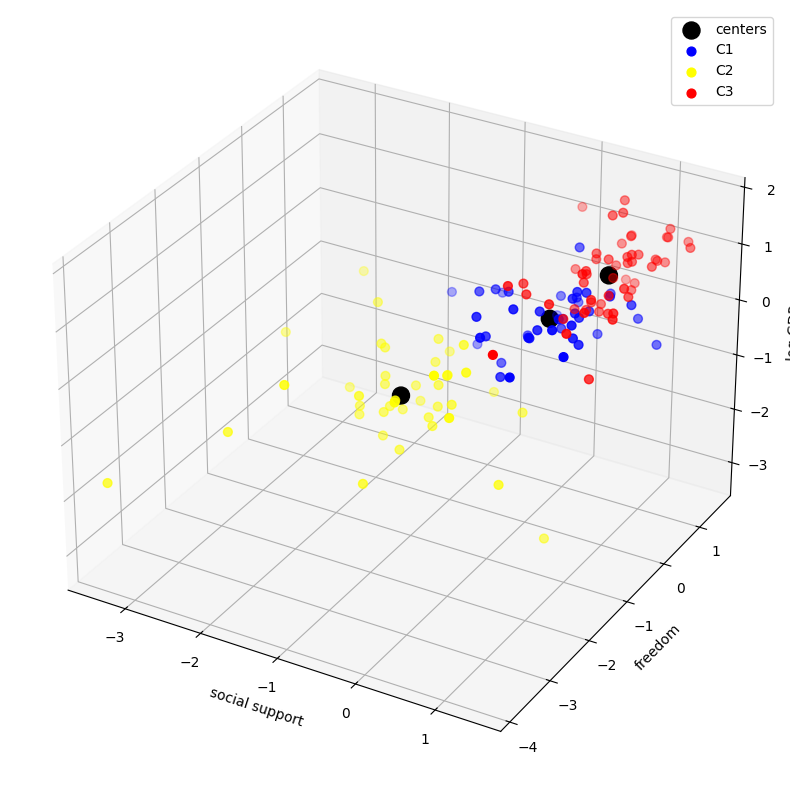

In [ ]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], 
           c="black", s=150, label="centers", alpha=1)

ax.scatter(X_scale[clusters == 0, 0], 
           X_scale[clusters == 0, 1], 
           X_scale[clusters == 0, 2], 
           c="blue", s=40, label="C1")

ax.scatter(X_scale[clusters == 1, 0], 
           X_scale[clusters == 1, 1], 
           X_scale[clusters == 1, 2], 
           c="yellow", s=40, label="C2")

ax.scatter(X_scale[clusters == 2, 0], 
           X_scale[clusters == 2, 1], 
           X_scale[clusters == 2, 2], 
           c="red", s=40, label="C3")

""" ax.scatter(X_scale[clusters == 3,0], 
           X_scale[clusters == 3,1], 
           X_scale[clusters == 3,2], 
           c="green", s=40, label="C4") """


ax.set_xlabel('social support')
ax.set_ylabel('freedom')
ax.set_zlabel('log GDP')
plt.legend()
plt.show()